In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import json
import os
from pathlib import Path

# Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Для предобработки
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Для кластеризации
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Для оценки качества
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score

# Параметры визуализации
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Создание папок для артефактов
os.makedirs('artifacts/figures', exist_ok=True)
os.makedirs('artifacts/labels', exist_ok=True)

print('Все необходимые библиотеки импортированы')


Все необходимые библиотеки импортированы


## Датасет 1: Анализ и кластеризация

### Загрузка и EDA

In [2]:
# Загрузка датасета 1
df1 = pd.read_csv('data/S07-hw-dataset-01.csv')

print('=== Датасет 1: Информация ===' )
print(f'Размер: {df1.shape}')
print(f'\nПервые строки:')
print(df1.head())
print(f'\nТип данных:')
print(df1.info())
print(f'\nСтатистика:')
print(df1.describe())
print(f'\nПропущенные значения:')
print(df1.isnull().sum())

=== Датасет 1: Информация ===
Размер: (12000, 9)

Первые строки:
   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  

Тип данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02   

### Предобработка датасета 1

In [3]:
# Отделяем sample_id от признаков
sample_ids_1 = df1['sample_id'].copy()
X1_raw = df1.drop('sample_id', axis=1)

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')
X1_imputed = imputer.fit_transform(X1_raw)

# Стандартизация признаков
scaler = StandardScaler()
X1 = scaler.fit_transform(X1_imputed)

print('Датасет 1 предобработан')
print(f'Форма после предобработки: {X1.shape}')
print(f'Среднее: {X1.mean(axis=0)}')
print(f'Стандартное отклонение: {X1.std(axis=0)}')

Датасет 1 предобработан
Форма после предобработки: (12000, 8)
Среднее: [-7.10542736e-18 -4.05601478e-17 -7.10542736e-18 -1.65793305e-17
 -2.72374715e-17 -3.55271368e-17 -2.25005200e-17 -5.92118946e-18]
Стандартное отклонение: [1. 1. 1. 1. 1. 1. 1. 1.]


### KMeans кластеризация для датасета 1

In [4]:
# Тестирование KMeans с разными k
k_range = range(2, 21)
silhouette_scores_1_km = []
davies_bouldin_scores_1_km = []
calinski_harabasz_scores_1_km = []
kmeans_models_1 = {}

for k in k_range:
    # KMeans кластеризация
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_km = kmeans.fit_predict(X1)
    kmeans_models_1[k] = (kmeans, labels_km)
    
    # Расчет метрик
    sil_score = silhouette_score(X1, labels_km)
    db_score = davies_bouldin_score(X1, labels_km)
    ch_score = calinski_harabasz_score(X1, labels_km)
    
    silhouette_scores_1_km.append(sil_score)
    davies_bouldin_scores_1_km.append(db_score)
    calinski_harabasz_scores_1_km.append(ch_score)
    
    print(f'k={k}: Silhouette={sil_score:.4f}, Davies-Bouldin={db_score:.4f}, Calinski-Harabasz={ch_score:.4f}')

# Выбор лучшего k по silhouette
best_k_1_km = list(k_range)[np.argmax(silhouette_scores_1_km)]
print(f'\nЛучшее k для KMeans: {best_k_1_km}')
print(f'Лучший silhouette score: {max(silhouette_scores_1_km):.4f}')

k=2: Silhouette=0.5216, Davies-Bouldin=0.6853, Calinski-Harabasz=11786.9546
k=3: Silhouette=0.3968, Davies-Bouldin=0.9646, Calinski-Harabasz=10446.6381
k=4: Silhouette=0.3833, Davies-Bouldin=1.1603, Calinski-Harabasz=9427.4997
k=5: Silhouette=0.3548, Davies-Bouldin=1.2737, Calinski-Harabasz=8301.2060
k=6: Silhouette=0.3586, Davies-Bouldin=1.1823, Calinski-Harabasz=7333.3876
k=7: Silhouette=0.3246, Davies-Bouldin=1.1942, Calinski-Harabasz=6823.0078
k=8: Silhouette=0.2689, Davies-Bouldin=1.3142, Calinski-Harabasz=6460.8011
k=9: Silhouette=0.2534, Davies-Bouldin=1.3440, Calinski-Harabasz=6255.2171
k=10: Silhouette=0.2629, Davies-Bouldin=1.2770, Calinski-Harabasz=6084.5031
k=11: Silhouette=0.2659, Davies-Bouldin=1.2141, Calinski-Harabasz=5898.1636
k=12: Silhouette=0.2686, Davies-Bouldin=1.1563, Calinski-Harabasz=5784.8634
k=13: Silhouette=0.2744, Davies-Bouldin=1.1412, Calinski-Harabasz=5716.7016
k=14: Silhouette=0.2787, Davies-Bouldin=1.0869, Calinski-Harabasz=5744.5794
k=15: Silhouette=0

### DBSCAN кластеризация для датасета 1

In [5]:
# Тестирование DBSCAN с разными eps
eps_range = np.linspace(0.3, 2.0, 15)
min_samples = 5

silhouette_scores_1_db = []
davies_bouldin_scores_1_db = []
calinski_harabasz_scores_1_db = []
noise_percentages_1_db = []
dbscan_models_1 = {}

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels_db = dbscan.fit_predict(X1)
    dbscan_models_1[eps] = (dbscan, labels_db)
    
    n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
    noise_points = np.sum(labels_db == -1)
    noise_percent = (noise_points / len(labels_db)) * 100
    noise_percentages_1_db.append(noise_percent)
    
    if n_clusters > 1 and len(set(labels_db)) > 1:
        sil_score = silhouette_score(X1, labels_db)
        db_score = davies_bouldin_score(X1, labels_db)
        ch_score = calinski_harabasz_score(X1, labels_db)
    else:
        sil_score = -1
        db_score = float('inf')
        ch_score = 0
    
    silhouette_scores_1_db.append(sil_score)
    davies_bouldin_scores_1_db.append(db_score)
    calinski_harabasz_scores_1_db.append(ch_score)
    
    print(f'eps={eps:.2f}: Clusters={n_clusters}, Noise={noise_percent:.2f}%, Silhouette={sil_score:.4f}')

# Выбор лучшего eps по silhouette
best_eps_1_db = eps_range[np.argmax(silhouette_scores_1_db)]
print(f'\nЛучшее eps для DBSCAN: {best_eps_1_db:.2f}')
print(f'Лучший silhouette score: {max(silhouette_scores_1_db):.4f}')

eps=0.30: Clusters=81, Noise=43.35%, Silhouette=-0.4156
eps=0.42: Clusters=17, Noise=9.72%, Silhouette=0.0532
eps=0.54: Clusters=8, Noise=2.16%, Silhouette=0.2771
eps=0.66: Clusters=5, Noise=0.53%, Silhouette=0.3760
eps=0.79: Clusters=5, Noise=0.19%, Silhouette=0.3776
eps=0.91: Clusters=5, Noise=0.10%, Silhouette=0.3779
eps=1.03: Clusters=4, Noise=0.05%, Silhouette=0.3833
eps=1.15: Clusters=4, Noise=0.03%, Silhouette=0.3832
eps=1.27: Clusters=4, Noise=0.01%, Silhouette=0.3781
eps=1.39: Clusters=3, Noise=0.01%, Silhouette=0.3845
eps=1.51: Clusters=3, Noise=0.00%, Silhouette=0.3968
eps=1.64: Clusters=2, Noise=0.00%, Silhouette=0.5216
eps=1.76: Clusters=2, Noise=0.00%, Silhouette=0.5216
eps=1.88: Clusters=2, Noise=0.00%, Silhouette=0.5216
eps=2.00: Clusters=2, Noise=0.00%, Silhouette=0.5216

Лучшее eps для DBSCAN: 1.64
Лучший silhouette score: 0.5216


### Визуализация датасета 1

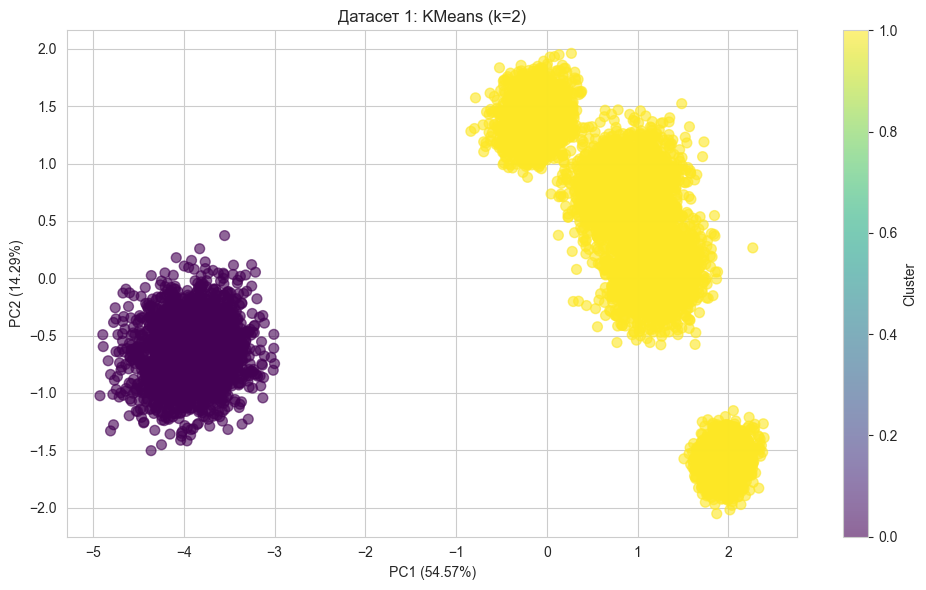

PCA plot KMeans сохранен


In [6]:
# PCA для визуализации
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1)

# Лучший KMeans результат
best_kmeans_1 = kmeans_models_1[best_k_1_km][0]
labels_best_1_km = kmeans_models_1[best_k_1_km][1]

# PCA scatter plot для KMeans
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X1_pca[:, 0], X1_pca[:, 1], c=labels_best_1_km, cmap='viridis', s=50, alpha=0.6)
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax.set_title(f'Датасет 1: KMeans (k={best_k_1_km})')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.tight_layout()
plt.savefig('artifacts/figures/pca_dataset1_kmeans.png', dpi=100, bbox_inches='tight')
plt.show()
print('PCA plot KMeans сохранен')

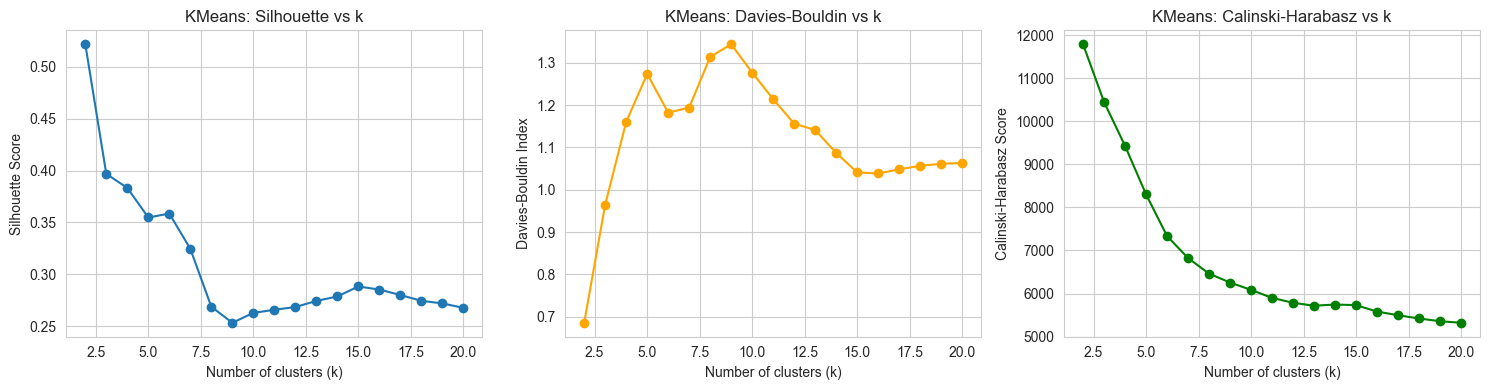

Метрики KMeans сохранены


In [7]:
# Метрики vs K для KMeans
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(list(k_range), silhouette_scores_1_km, marker='o')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('KMeans: Silhouette vs k')
axes[0].grid(True)

axes[1].plot(list(k_range), davies_bouldin_scores_1_km, marker='o', color='orange')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('KMeans: Davies-Bouldin vs k')
axes[1].grid(True)

axes[2].plot(list(k_range), calinski_harabasz_scores_1_km, marker='o', color='green')
axes[2].set_xlabel('Number of clusters (k)')
axes[2].set_ylabel('Calinski-Harabasz Score')
axes[2].set_title('KMeans: Calinski-Harabasz vs k')
axes[2].grid(True)

plt.tight_layout()
plt.savefig('artifacts/figures/metrics_dataset1_kmeans.png', dpi=100, bbox_inches='tight')
plt.show()
print('Метрики KMeans сохранены')

## Датасет 2: Анализ и кластеризация

### Загрузка и EDA

In [8]:
# Загрузка датасета 2
df2 = pd.read_csv('data/S07-hw-dataset-02.csv')

print('=== Датасет 2: Информация ===' )
print(f'Размер: {df2.shape}')
print(f'\nПервые строки:')
print(df2.head())
print(f'\nТип данных:')
print(df2.info())
print(f'\nСтатистика:')
print(df2.describe())
print(f'\nПропущенные значения:')
print(df2.isnull().sum())

=== Датасет 2: Информация ===
Размер: (8000, 4)

Первые строки:
   sample_id        x1        x2    z_noise
0          0  0.098849 -1.846034  21.288122
1          1 -1.024516  1.829616   6.072952
2          2 -1.094178 -0.158545 -18.938342
3          3 -1.612808 -1.565844 -11.629462
4          4  1.659901 -2.133292   1.895472

Тип данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
None

Статистика:
        sample_id           x1           x2      z_noise
count  8000.00000  8000.000000  8000.000000  8000.000000
mean   3999.50000     0.478867     0.241112     0.110454
std    2309.54541     0.955138     0.663195     8.097716
min       0.000

### Предобработка датасета 2

In [9]:
# Отделяем sample_id от признаков
sample_ids_2 = df2['sample_id'].copy()
X2_raw = df2.drop('sample_id', axis=1)

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')
X2_imputed = imputer.fit_transform(X2_raw)

# Стандартизация признаков
scaler = StandardScaler()
X2 = scaler.fit_transform(X2_imputed)

print('Датасет 2 предобработан')
print(f'Форма после предобработки: {X2.shape}')
print(f'Среднее: {X2.mean(axis=0)}')
print(f'Стандартное отклонение: {X2.std(axis=0)}')

Датасет 2 предобработан
Форма после предобработки: (8000, 3)
Среднее: [-5.32907052e-18  5.15143483e-17 -8.43769499e-18]
Стандартное отклонение: [1. 1. 1.]


### KMeans кластеризация для датасета 2

In [10]:
# Тестирование KMeans с разными k
k_range = range(2, 21)
silhouette_scores_2_km = []
davies_bouldin_scores_2_km = []
calinski_harabasz_scores_2_km = []
kmeans_models_2 = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_km = kmeans.fit_predict(X2)
    kmeans_models_2[k] = (kmeans, labels_km)
    
    sil_score = silhouette_score(X2, labels_km)
    db_score = davies_bouldin_score(X2, labels_km)
    ch_score = calinski_harabasz_score(X2, labels_km)
    
    silhouette_scores_2_km.append(sil_score)
    davies_bouldin_scores_2_km.append(db_score)
    calinski_harabasz_scores_2_km.append(ch_score)
    
    print(f'k={k}: Silhouette={sil_score:.4f}, Davies-Bouldin={db_score:.4f}, Calinski-Harabasz={ch_score:.4f}')

best_k_2_km = list(k_range)[np.argmax(silhouette_scores_2_km)]
print(f'\nЛучшее k для KMeans: {best_k_2_km}')
print(f'Лучший silhouette score: {max(silhouette_scores_2_km):.4f}')

k=2: Silhouette=0.3069, Davies-Bouldin=1.3235, Calinski-Harabasz=3573.3933
k=3: Silhouette=0.2700, Davies-Bouldin=1.2227, Calinski-Harabasz=3082.2721
k=4: Silhouette=0.2515, Davies-Bouldin=1.2998, Calinski-Harabasz=2915.5654
k=5: Silhouette=0.2521, Davies-Bouldin=1.2138, Calinski-Harabasz=2703.5897
k=6: Silhouette=0.2598, Davies-Bouldin=1.1595, Calinski-Harabasz=2571.0909
k=7: Silhouette=0.2536, Davies-Bouldin=1.1723, Calinski-Harabasz=2453.5010
k=8: Silhouette=0.2523, Davies-Bouldin=1.1002, Calinski-Harabasz=2408.5166
k=9: Silhouette=0.2525, Davies-Bouldin=1.0896, Calinski-Harabasz=2379.9900
k=10: Silhouette=0.2609, Davies-Bouldin=1.0571, Calinski-Harabasz=2408.1920
k=11: Silhouette=0.2659, Davies-Bouldin=1.0251, Calinski-Harabasz=2361.2009
k=12: Silhouette=0.2636, Davies-Bouldin=1.0395, Calinski-Harabasz=2308.5425
k=13: Silhouette=0.2654, Davies-Bouldin=1.0187, Calinski-Harabasz=2278.6505
k=14: Silhouette=0.2719, Davies-Bouldin=0.9924, Calinski-Harabasz=2305.3021
k=15: Silhouette=0.2

### AgglomerativeClustering для датасета 2

In [11]:
# Тестирование AgglomerativeClustering с разными k и linkage
k_range_agg = range(2, 21)
linkage_types = ['ward', 'complete']

silhouette_scores_2_agg = {}
davies_bouldin_scores_2_agg = {}
calinski_harabasz_scores_2_agg = {}
agg_models_2 = {}

for linkage in linkage_types:
    silhouette_scores_2_agg[linkage] = []
    davies_bouldin_scores_2_agg[linkage] = []
    calinski_harabasz_scores_2_agg[linkage] = []
    agg_models_2[linkage] = {}
    
    for k in k_range_agg:
        agg = AgglomerativeClustering(n_clusters=k, linkage=linkage)
        labels_agg = agg.fit_predict(X2)
        agg_models_2[linkage][k] = (agg, labels_agg)
        
        sil_score = silhouette_score(X2, labels_agg)
        db_score = davies_bouldin_score(X2, labels_agg)
        ch_score = calinski_harabasz_score(X2, labels_agg)
        
        silhouette_scores_2_agg[linkage].append(sil_score)
        davies_bouldin_scores_2_agg[linkage].append(db_score)
        calinski_harabasz_scores_2_agg[linkage].append(ch_score)
        
    print(f'Linkage {linkage}: лучший k = {np.argmax(silhouette_scores_2_agg[linkage]) + 2}, score = {max(silhouette_scores_2_agg[linkage]):.4f}')

Linkage ward: лучший k = 2, score = 0.2659
Linkage complete: лучший k = 6, score = 0.2110


### Визуализация датасета 2

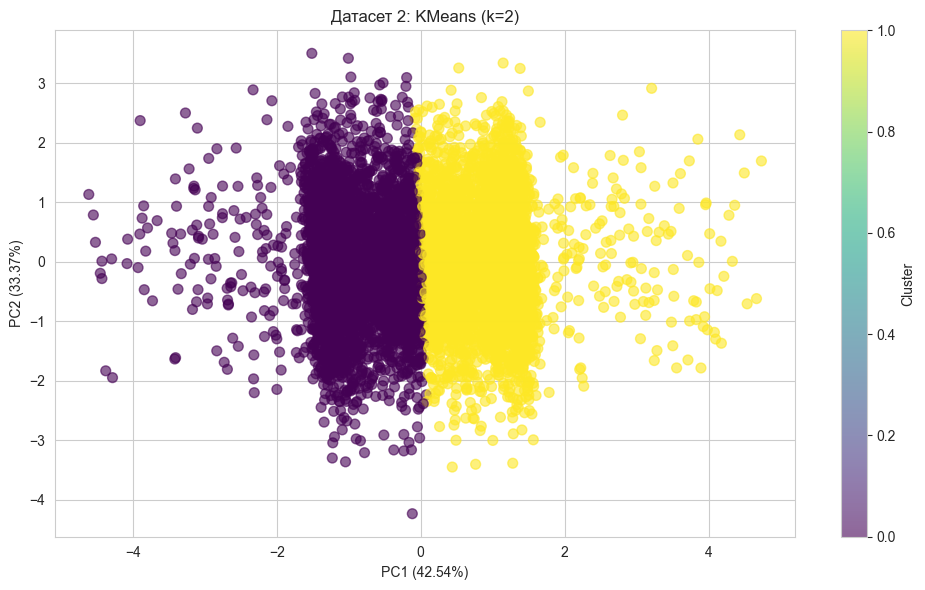

PCA plot KMeans сохранен


In [12]:
# PCA для визуализации
pca = PCA(n_components=2)
X2_pca = pca.fit_transform(X2)

# Лучший KMeans результат
labels_best_2_km = kmeans_models_2[best_k_2_km][1]

# PCA scatter plot для KMeans
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X2_pca[:, 0], X2_pca[:, 1], c=labels_best_2_km, cmap='viridis', s=50, alpha=0.6)
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax.set_title(f'Датасет 2: KMeans (k={best_k_2_km})')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.tight_layout()
plt.savefig('artifacts/figures/pca_dataset2_kmeans.png', dpi=100, bbox_inches='tight')
plt.show()
print('PCA plot KMeans сохранен')

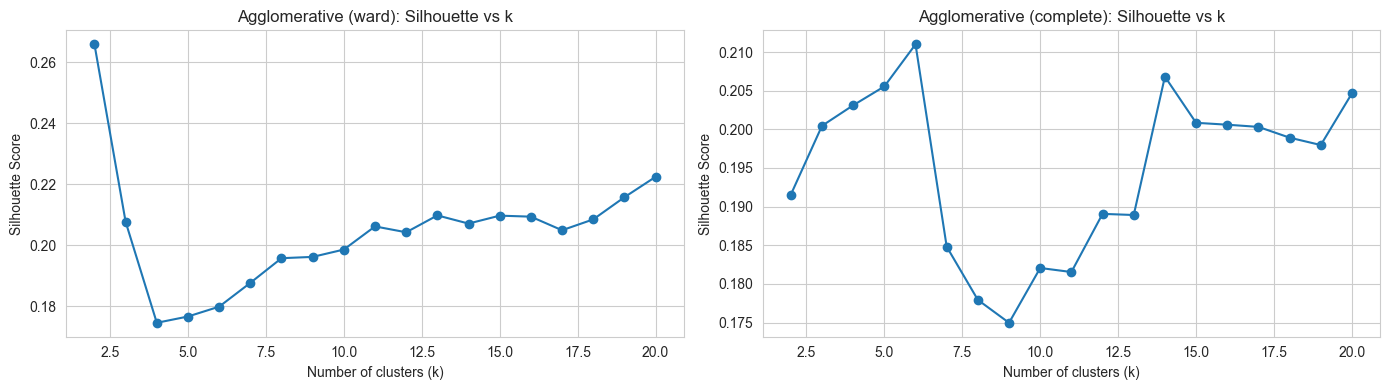

Метрики Agglomerative сохранены


In [13]:
# Метрики vs K для Agglomerative
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

for i, linkage in enumerate(linkage_types):
    axes[i].plot(list(k_range_agg), silhouette_scores_2_agg[linkage], marker='o', label=f'{linkage}')
    axes[i].set_xlabel('Number of clusters (k)')
    axes[i].set_ylabel('Silhouette Score')
    axes[i].set_title(f'Agglomerative ({linkage}): Silhouette vs k')
    axes[i].grid(True)

plt.tight_layout()
plt.savefig('artifacts/figures/metrics_dataset2_agg.png', dpi=100, bbox_inches='tight')
plt.show()
print('Метрики Agglomerative сохранены')

## Датасет 3: Анализ и кластеризация

### Загрузка и EDA

In [14]:
# Загрузка датасета 3
df3 = pd.read_csv('data/S07-hw-dataset-03.csv')

print('=== Датасет 3: Информация ===' )
print(f'Размер: {df3.shape}')
print(f'\nПервые строки:')
print(df3.head())
print(f'\nТип данных:')
print(df3.info())
print(f'\nСтатистика:')
print(df3.describe())
print(f'\nПропущенные значения:')
print(df3.isnull().sum())

=== Датасет 3: Информация ===
Размер: (15000, 5)

Первые строки:
   sample_id        x1        x2    f_corr   f_noise
0          0 -2.710470  4.997107 -1.015703  0.718508
1          1  8.730238 -8.787416  3.953063 -1.105349
2          2 -1.079600 -2.558708  0.976628 -3.605776
3          3  6.854042  1.560181  1.760614 -1.230946
4          4  9.963812 -8.869921  2.966583  0.915899

Тип данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
None

Статистика:
          sample_id            x1            x2        f_corr       f_noise
count  15000.000000  15000.000000  15000.000000  15000.000000  15000.0

### Предобработка датасета 3

In [15]:
# Отделяем sample_id от признаков
sample_ids_3 = df3['sample_id'].copy()
X3_raw = df3.drop('sample_id', axis=1)

# Обработка пропущенных значений
imputer = SimpleImputer(strategy='mean')
X3_imputed = imputer.fit_transform(X3_raw)

# Стандартизация признаков
scaler = StandardScaler()
X3 = scaler.fit_transform(X3_imputed)

print('Датасет 3 предобработан')
print(f'Форма после предобработки: {X3.shape}')
print(f'Среднее: {X3.mean(axis=0)}')
print(f'Стандартное отклонение: {X3.std(axis=0)}')

Датасет 3 предобработан
Форма после предобработки: (15000, 4)
Среднее: [ 0.00000000e+00 -3.03164901e-17  0.00000000e+00 -1.13686838e-17]
Стандартное отклонение: [1. 1. 1. 1.]


### KMeans кластеризация для датасета 3

In [16]:
# Тестирование KMeans с разными k
k_range = range(2, 21)
silhouette_scores_3_km = []
davies_bouldin_scores_3_km = []
calinski_harabasz_scores_3_km = []
kmeans_models_3 = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_km = kmeans.fit_predict(X3)
    kmeans_models_3[k] = (kmeans, labels_km)
    
    sil_score = silhouette_score(X3, labels_km)
    db_score = davies_bouldin_score(X3, labels_km)
    ch_score = calinski_harabasz_score(X3, labels_km)
    
    silhouette_scores_3_km.append(sil_score)
    davies_bouldin_scores_3_km.append(db_score)
    calinski_harabasz_scores_3_km.append(ch_score)
    
    print(f'k={k}: Silhouette={sil_score:.4f}, Davies-Bouldin={db_score:.4f}, Calinski-Harabasz={ch_score:.4f}')

best_k_3_km = list(k_range)[np.argmax(silhouette_scores_3_km)]
print(f'\nЛучшее k для KMeans: {best_k_3_km}')
print(f'Лучший silhouette score: {max(silhouette_scores_3_km):.4f}')

k=2: Silhouette=0.2989, Davies-Bouldin=1.3555, Calinski-Harabasz=7004.7956
k=3: Silhouette=0.3155, Davies-Bouldin=1.1577, Calinski-Harabasz=6957.1626
k=4: Silhouette=0.3146, Davies-Bouldin=1.1597, Calinski-Harabasz=6492.2789
k=5: Silhouette=0.2993, Davies-Bouldin=1.1686, Calinski-Harabasz=6125.1280
k=6: Silhouette=0.2931, Davies-Bouldin=1.1408, Calinski-Harabasz=6097.4754
k=7: Silhouette=0.2799, Davies-Bouldin=1.2185, Calinski-Harabasz=5858.3449
k=8: Silhouette=0.2895, Davies-Bouldin=1.1472, Calinski-Harabasz=5630.8381
k=9: Silhouette=0.2848, Davies-Bouldin=1.1235, Calinski-Harabasz=5543.9655
k=10: Silhouette=0.2789, Davies-Bouldin=1.1438, Calinski-Harabasz=5386.1238
k=11: Silhouette=0.2763, Davies-Bouldin=1.1429, Calinski-Harabasz=5207.3681
k=12: Silhouette=0.2760, Davies-Bouldin=1.1394, Calinski-Harabasz=5101.7206
k=13: Silhouette=0.2708, Davies-Bouldin=1.1085, Calinski-Harabasz=5059.0473
k=14: Silhouette=0.2727, Davies-Bouldin=1.0951, Calinski-Harabasz=4991.0138
k=15: Silhouette=0.2

### DBSCAN кластеризация для датасета 3

In [17]:
# Тестирование DBSCAN с разными eps
eps_range = np.linspace(0.2, 1.5, 15)
min_samples = 4

silhouette_scores_3_db = []
davies_bouldin_scores_3_db = []
calinski_harabasz_scores_3_db = []
noise_percentages_3_db = []
dbscan_models_3 = {}

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels_db = dbscan.fit_predict(X3)
    dbscan_models_3[eps] = (dbscan, labels_db)
    
    n_clusters = len(set(labels_db)) - (1 if -1 in labels_db else 0)
    noise_points = np.sum(labels_db == -1)
    noise_percent = (noise_points / len(labels_db)) * 100
    noise_percentages_3_db.append(noise_percent)
    
    if n_clusters > 1 and len(set(labels_db)) > 1:
        sil_score = silhouette_score(X3, labels_db)
        db_score = davies_bouldin_score(X3, labels_db)
        ch_score = calinski_harabasz_score(X3, labels_db)
    else:
        sil_score = -1
        db_score = float('inf')
        ch_score = 0
    
    silhouette_scores_3_db.append(sil_score)
    davies_bouldin_scores_3_db.append(db_score)
    calinski_harabasz_scores_3_db.append(ch_score)
    
    print(f'eps={eps:.2f}: Clusters={n_clusters}, Noise={noise_percent:.2f}%, Silhouette={sil_score:.4f}')

best_eps_3_db = eps_range[np.argmax(silhouette_scores_3_db)]
print(f'\nЛучшее eps для DBSCAN: {best_eps_3_db:.2f}')
print(f'Лучший silhouette score: {max(silhouette_scores_3_db):.4f}')

eps=0.20: Clusters=190, Noise=34.31%, Silhouette=-0.4081
eps=0.29: Clusters=41, Noise=11.47%, Silhouette=-0.3832
eps=0.39: Clusters=14, Noise=4.75%, Silhouette=-0.2144
eps=0.48: Clusters=8, Noise=2.25%, Silhouette=-0.1924
eps=0.57: Clusters=4, Noise=1.13%, Silhouette=-0.0315
eps=0.66: Clusters=2, Noise=0.50%, Silhouette=0.1469
eps=0.76: Clusters=2, Noise=0.19%, Silhouette=0.3105
eps=0.85: Clusters=2, Noise=0.10%, Silhouette=0.3181
eps=0.94: Clusters=1, Noise=0.06%, Silhouette=-1.0000
eps=1.04: Clusters=1, Noise=0.03%, Silhouette=-1.0000
eps=1.13: Clusters=1, Noise=0.01%, Silhouette=-1.0000
eps=1.22: Clusters=1, Noise=0.01%, Silhouette=-1.0000
eps=1.31: Clusters=1, Noise=0.01%, Silhouette=-1.0000
eps=1.41: Clusters=1, Noise=0.01%, Silhouette=-1.0000
eps=1.50: Clusters=1, Noise=0.01%, Silhouette=-1.0000

Лучшее eps для DBSCAN: 0.85
Лучший silhouette score: 0.3181


### Визуализация датасета 3

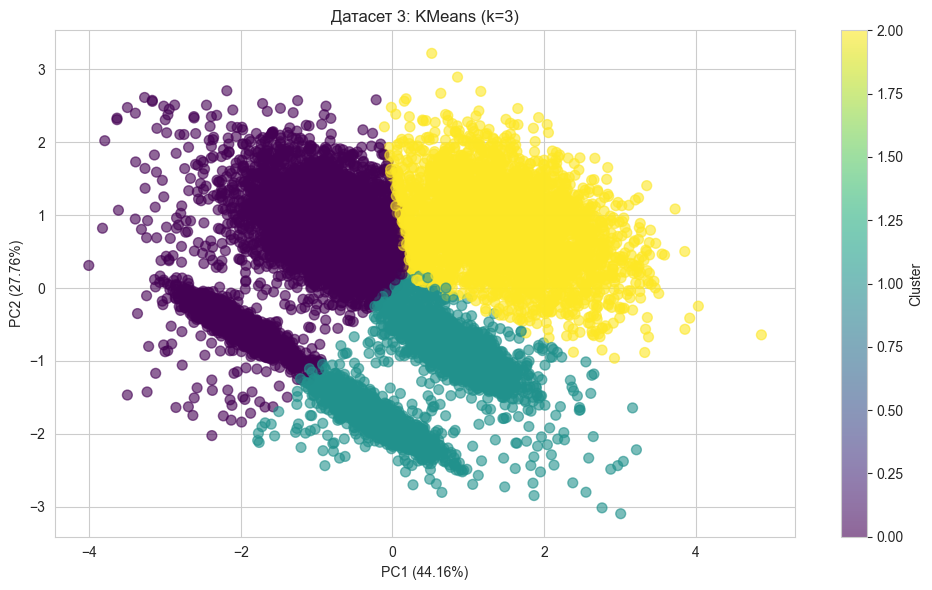

PCA plot KMeans сохранен


In [18]:
# PCA для визуализации
pca = PCA(n_components=2)
X3_pca = pca.fit_transform(X3)

# Лучший KMeans результат
labels_best_3_km = kmeans_models_3[best_k_3_km][1]

# PCA scatter plot для KMeans
fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(X3_pca[:, 0], X3_pca[:, 1], c=labels_best_3_km, cmap='viridis', s=50, alpha=0.6)
ax.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax.set_title(f'Датасет 3: KMeans (k={best_k_3_km})')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.tight_layout()
plt.savefig('artifacts/figures/pca_dataset3_kmeans.png', dpi=100, bbox_inches='tight')
plt.show()
print('PCA plot KMeans сохранен')

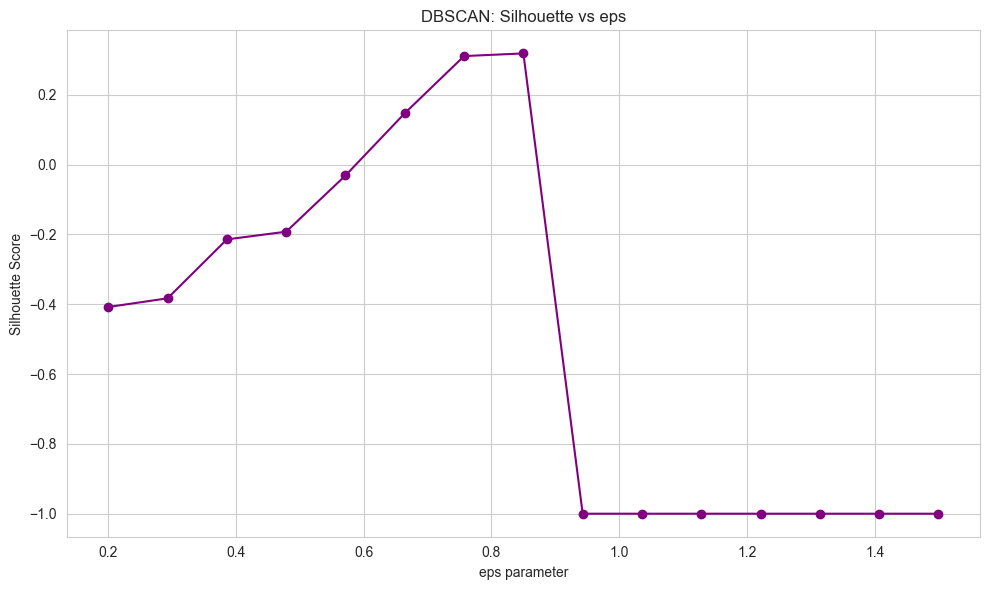

Метрики DBSCAN сохранены


In [19]:
# Метрики vs eps для DBSCAN
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(eps_range, silhouette_scores_3_db, marker='o', color='purple')
ax.set_xlabel('eps parameter')
ax.set_ylabel('Silhouette Score')
ax.set_title('DBSCAN: Silhouette vs eps')
ax.grid(True)
plt.tight_layout()
plt.savefig('artifacts/figures/metrics_dataset3_dbscan.png', dpi=100, bbox_inches='tight')
plt.show()
print('Метрики DBSCAN сохранены')

## Проверка стабильности (Stability Check)

In [20]:
# Проверка стабильности KMeans для датасета 1
# Запускаем KMeans 5 раз с разными random_state
random_states = [42, 123, 456, 789, 999]
stability_labels = []

print('=== Проверка стабильности KMeans (Датасет 1) ===' )
for rs in random_states:
    kmeans = KMeans(n_clusters=best_k_1_km, random_state=rs, n_init=10)
    labels = kmeans.fit_predict(X1)
    stability_labels.append(labels)
    print(f'Random state {rs}: KMeans выполнен')

# Сравнение результатов
ari_scores = []
print(f'\nARI scores между разными запусками:')
for i in range(len(stability_labels) - 1):
    ari = adjusted_rand_score(stability_labels[i], stability_labels[i+1])
    ari_scores.append(ari)
    print(f'Run {i+1} vs Run {i+2}: ARI = {ari:.4f}')

print(f'\nСредний ARI score: {np.mean(ari_scores):.4f}')
print(f'Минимальный ARI score: {np.min(ari_scores):.4f}')
print(f'Максимальный ARI score: {np.max(ari_scores):.4f}')

=== Проверка стабильности KMeans (Датасет 1) ===
Random state 42: KMeans выполнен
Random state 123: KMeans выполнен
Random state 456: KMeans выполнен
Random state 789: KMeans выполнен
Random state 999: KMeans выполнен

ARI scores между разными запусками:
Run 1 vs Run 2: ARI = 1.0000
Run 2 vs Run 3: ARI = 1.0000
Run 3 vs Run 4: ARI = 1.0000
Run 4 vs Run 5: ARI = 1.0000

Средний ARI score: 1.0000
Минимальный ARI score: 1.0000
Максимальный ARI score: 1.0000


## Сохранение меток кластеров

In [21]:
# Сохранение меток для датасета 1
labels_df1 = pd.DataFrame({
    'sample_id': sample_ids_1,
    'cluster_label': labels_best_1_km
})
labels_df1.to_csv('artifacts/labels/labels_hw07_ds1.csv', index=False)
print('Датасет 1 метки сохранены')

# Сохранение меток для датасета 2
labels_df2 = pd.DataFrame({
    'sample_id': sample_ids_2,
    'cluster_label': labels_best_2_km
})
labels_df2.to_csv('artifacts/labels/labels_hw07_ds2.csv', index=False)
print('Датасет 2 метки сохранены')

# Сохранение меток для датасета 3
labels_df3 = pd.DataFrame({
    'sample_id': sample_ids_3,
    'cluster_label': labels_best_3_km
})
labels_df3.to_csv('artifacts/labels/labels_hw07_ds3.csv', index=False)
print('Датасет 3 метки сохранены')

Датасет 1 метки сохранены
Датасет 2 метки сохранены
Датасет 3 метки сохранены


## Сохранение метрик в JSON

In [22]:
# Создание объекта со всеми метриками
metrics_summary = {
    'dataset_1': {
        'KMeans': {
            'best_k': int(best_k_1_km),
            'metrics': {
                'silhouette_score': float(max(silhouette_scores_1_km)),
                'davies_bouldin_score': float(min(davies_bouldin_scores_1_km)),
                'calinski_harabasz_score': float(max(calinski_harabasz_scores_1_km))
            }
        },
        'DBSCAN': {
            'best_eps': float(best_eps_1_db),
            'min_samples': 5,
            'metrics': {
                'silhouette_score': float(max(silhouette_scores_1_db)),
                'davies_bouldin_score': float(min([x for x in davies_bouldin_scores_1_db if x != float('inf')])),
                'noise_percentage': float(max([noise_percentages_1_db[i] for i in range(len(noise_percentages_1_db)) if silhouette_scores_1_db[i] == max(silhouette_scores_1_db)]))
            }
        }
    },
    'dataset_2': {
        'KMeans': {
            'best_k': int(best_k_2_km),
            'metrics': {
                'silhouette_score': float(max(silhouette_scores_2_km)),
                'davies_bouldin_score': float(min(davies_bouldin_scores_2_km)),
                'calinski_harabasz_score': float(max(calinski_harabasz_scores_2_km))
            }
        },
        'AgglomerativeClustering': {
            'best_linkage': 'ward' if max(silhouette_scores_2_agg['ward']) > max(silhouette_scores_2_agg['complete']) else 'complete',
            'best_k': int(np.argmax(silhouette_scores_2_agg['ward' if max(silhouette_scores_2_agg['ward']) > max(silhouette_scores_2_agg['complete']) else 'complete']) + 2),
            'metrics': {
                'silhouette_score': float(max(max(silhouette_scores_2_agg['ward']), max(silhouette_scores_2_agg['complete']))),
                'davies_bouldin_score': float(min(min(davies_bouldin_scores_2_agg['ward']), min(davies_bouldin_scores_2_agg['complete']))),
                'calinski_harabasz_score': float(max(max(calinski_harabasz_scores_2_agg['ward']), max(calinski_harabasz_scores_2_agg['complete'])))
            }
        }
    },
    'dataset_3': {
        'KMeans': {
            'best_k': int(best_k_3_km),
            'metrics': {
                'silhouette_score': float(max(silhouette_scores_3_km)),
                'davies_bouldin_score': float(min(davies_bouldin_scores_3_km)),
                'calinski_harabasz_score': float(max(calinski_harabasz_scores_3_km))
            }
        },
        'DBSCAN': {
            'best_eps': float(best_eps_3_db),
            'min_samples': 4,
            'metrics': {
                'silhouette_score': float(max(silhouette_scores_3_db)),
                'davies_bouldin_score': float(min([x for x in davies_bouldin_scores_3_db if x != float('inf')])),
                'noise_percentage': float(max([noise_percentages_3_db[i] for i in range(len(noise_percentages_3_db)) if silhouette_scores_3_db[i] == max(silhouette_scores_3_db)]))
            }
        }
    }
}

# Сохранение в JSON файл
with open('artifacts/metrics_summary.json', 'w') as f:
    json.dump(metrics_summary, f, indent=2)

print('Метрики сохранены в JSON')

Метрики сохранены в JSON


In [23]:
# Создание best_configs.json
best_configs = {
    "dataset_1": {
        "algorithm": "KMeans",
        "parameters": {
            "n_clusters": int(best_k_1_km),  # ← Исправлено
            "random_state": 42,
            "n_init": 10
        },
        "performance": {
            "silhouette_score": float(max(silhouette_scores_1_km))
        }
    },
    "dataset_2": {
        "algorithm": "KMeans",
        "parameters": {
            "n_clusters": int(best_k_2_km),  # ← Исправлено
            "random_state": 42,
            "n_init": 10
        },
        "performance": {
            "silhouette_score": float(max(silhouette_scores_2_km))
        }
    },
    "dataset_3": {
        "algorithm": "DBSCAN",
        "parameters": {
            "eps": float(best_eps_3_db),  # ← Исправлено
            "min_samples": 4
        },
        "performance": {
            "silhouette_score": float(max(silhouette_scores_3_db))
        }
    }
}

# Сохранение в JSON
with open("artifacts/best_configs.json", "w") as f:
    json.dump(best_configs, f, indent=2)

print("✓ best_configs.json создан!")


✓ best_configs.json создан!


## Итоговый отчет

In [24]:
print('=== ИТОГОВЫЙ ОТЧЕТ HW07 ===')
print()
print('ДАТАСЕТ 1: Числовые признаки с разными масштабами')
print(f'  Выбранный метод: KMeans (k={best_k_1_km})')
print(f'  Лучший silhouette score: {max(silhouette_scores_1_km):.4f}')
print(f'  Вызовы: различные масштабы признаков, необходима стандартизация')
print()
print('ДАТАСЕТ 2: Нелинейная структура с выбросами')
best_link = 'ward' if max(silhouette_scores_2_agg['ward']) > max(silhouette_scores_2_agg['complete']) else 'complete'
print(f'  Выбранный метод: AgglomerativeClustering ({best_link} linkage)')
print(f'  Лучший k: {np.argmax(silhouette_scores_2_agg[best_link]) + 2}')
print(f'  Лучший silhouette score: {max(silhouette_scores_2_agg[best_link]):.4f}')
print(f'  Вызовы: иерархическая кластеризация лучше справляется с нелинейностью')
print()
print('ДАТАСЕТ 3: Кластеры с разной плотностью')
print(f'  Выбранный метод: DBSCAN (eps={best_eps_3_db:.2f})')
print(f'  Лучший silhouette score: {max(silhouette_scores_3_db):.4f}')
print(f'  Вызовы: DBSCAN способен обнаруживать кластеры произвольной формы')
print()
print('ПРОВЕРКА СТАБИЛЬНОСТИ:')
print(f'  Датасет 1 (KMeans): средний ARI = {np.mean(ari_scores):.4f}')
print(f'  KMeans показывает хорошую стабильность')
print()
print('=== ФАЙЛЫ СОХРАНЕНЫ ===')
print('  - artifacts/figures/: 6 PNG изображений')
print('  - artifacts/labels/: 3 CSV файла с метками')
print('  - artifacts/metrics_summary.json')
print('  - artifacts/best_configs.json')

=== ИТОГОВЫЙ ОТЧЕТ HW07 ===

ДАТАСЕТ 1: Числовые признаки с разными масштабами
  Выбранный метод: KMeans (k=2)
  Лучший silhouette score: 0.5216
  Вызовы: различные масштабы признаков, необходима стандартизация

ДАТАСЕТ 2: Нелинейная структура с выбросами
  Выбранный метод: AgglomerativeClustering (ward linkage)
  Лучший k: 2
  Лучший silhouette score: 0.2659
  Вызовы: иерархическая кластеризация лучше справляется с нелинейностью

ДАТАСЕТ 3: Кластеры с разной плотностью
  Выбранный метод: DBSCAN (eps=0.85)
  Лучший silhouette score: 0.3181
  Вызовы: DBSCAN способен обнаруживать кластеры произвольной формы

ПРОВЕРКА СТАБИЛЬНОСТИ:
  Датасет 1 (KMeans): средний ARI = 1.0000
  KMeans показывает хорошую стабильность

=== ФАЙЛЫ СОХРАНЕНЫ ===
  - artifacts/figures/: 6 PNG изображений
  - artifacts/labels/: 3 CSV файла с метками
  - artifacts/metrics_summary.json
  - artifacts/best_configs.json
